In [1]:
import sys

boneName = []
frameCount = 0

# if (len(sys.argv)!=2):
#     print ('Usage: python bvhparser.py path/to/filename')
#     sys.exit()

filename = "C:/Users/Dell/Downloads/BVHExtract.bvh"
    # sys.argv[1]

text_file = open(filename, "r")
f = data = text_file.read()
words = f.split()
addNext = False


for word in words:
    if addNext:

        boneName.append(word + 'Xpos')
        boneName.append(word + 'Ypos')
        boneName.append(word + 'Zpos')
        boneName.append(word + 'Yrot')
        boneName.append(word + 'Xrot')
        boneName.append(word + 'Zrot')

        addNext = False

    if word == 'ROOT' or word == 'JOINT':
        addNext = True

    if word == 'Frames:':
        frameCount = int(words[words.index('Frames:')+1])
    if word == 'Time:':
        words = words[words.index('Time:')+2:]
        break

data = [[] for _ in range(len(boneName))]
size = len(boneName)


count = 0
for word in words:
    bin = count % size
    data[bin].append(word)
    count+=1


f = open(filename[:filename.index('.')] + ".csv",'w')
f.write('Frames,')
for i in range(1, frameCount+1):
    f.write(str(i) + ',')
f.write('\n')

count = 0
for name in boneName:
    f.write(name + ',')
    for word in data[count]:
        f.write(word + ',')
    f.write('\n')
    count+=1

f.close()
text_file.close()

In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/Dell/Downloads/BVHExtract.csv')

In [4]:
df

,Frames,1,2,3,4,5,6,7,8,9,...,2494,2495,2496,2497,2498,2499,2500,2501,2502,Unnamed: 2503
0,HipsXpos,0.054249,0.054249,0.054361,0.054474,0.054662,0.055023,0.055646,0.056575,0.057779,...,0.031451,0.031140,0.030829,0.030523,0.030228,0.029955,0.029712,0.029500,0.029305,NaN
1,HipsYpos,0.214560,0.214560,0.214786,0.214809,0.214591,0.214152,0.213593,0.213089,0.212853,...,0.267467,0.267519,0.267538,0.267531,0.267510,0.267485,0.267470,0.267467,0.267477,NaN
2,HipsZpos,0.937189,0.937189,0.937297,0.937391,0.937451,0.937470,0.937458,0.937436,0.937419,...,0.930831,0.930796,0.930745,0.930687,0.930635,0.930603,0.930598,0.930618,0.930656,NaN
3,HipsYrot,-8.508870,-8.508870,-8.192862,-7.764232,-7.226887,-6.613533,-5.985006,-5.420797,-5.001943,...,-8.184675,-8.182975,-8.175163,-8.159813,-8.136431,-8.105783,-8.069581,-8.029821,-7.987086,NaN
4,HipsXrot,0.342553,0.342553,0.440645,0.539206,0.626303,0.690758,0.726370,0.735321,0.728650,...,0.950022,0.989890,1.023515,1.050267,1.070172,1.083700,1.091695,1.095399,1.096452,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,RightToeBaseYpos,-0.155612,-0.155612,-0.155612,-0.155612,-0.155612,-0.155612,-0.155612,-0.155612,-0.155612,...,-0.155612,-0.155612,-0.155612,-0.155612,-0.155612,-0.155612,-0.155612,-0.155611,-0.155612,NaN
140,RightToeBaseZpos,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,...,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,-0.043728,NaN
141,RightToeBaseYrot,-7.402399,-7.402399,-7.523237,-7.637270,-7.729579,-7.793534,-7.833654,-7.862576,-7.893897,...,-5.980622,-5.983761,-5.975129,-5.957607,-5.934762,-5.909451,-5.883177,-5.856219,-5.827823,NaN
142,RightToeBaseXrot,0.068188,0.068188,0.069932,0.071577,0.072910,0.073838,0.074421,0.074841,0.075296,...,0.046666,0.046628,0.046612,0.046658,0.046643,0.046374,0.046040,0.045814,0.045353,NaN


In [128]:

df1 = df.fillna(0)


In [129]:
print(df1)
# list(df1)

               Frames           1           2           3          4  \
0            HipsXpos    0.000000  164.139000  170.783000  162.59000   
1            HipsYpos   -0.044688 -179.997000 -176.740000 -179.98800   
2            HipsZpos    0.042752 -175.683000 -171.893000  175.78400   
3            HipsYrot   -0.000000    0.618338    1.281670    1.21349   
4            HipsXrot    0.000000    0.000000  -10.005800    0.00000   
..                ...         ...         ...         ...        ...   
139  RightToeBaseYpos -176.121000  179.995000  168.759000   74.97680   
140  RightToeBaseZpos -172.192000  175.468000  169.254000 -178.94600   
141  RightToeBaseYrot    0.994226    0.766563    8.090970   -0.00000   
142  RightToeBaseXrot  -10.009100    0.000000   10.002200    4.26084   
143  RightToeBaseZrot   -0.243526    0.000000   -0.254092    1.62136   

             5          6          7          8           9  ...  62188  \
0    170.11500  178.94600    1.05113  176.93600    0.651471 

In [130]:
import plotly.express as px

nparray = df1.to_numpy()
l = len(nparray[0][1:])+1
xrange = [i for i in range(1,l)]
yrange = nparray[0][1:]

fig = px.line( x=xrange, y=yrange, title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

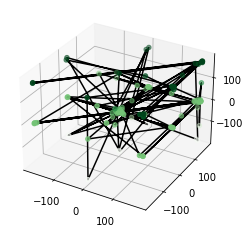

In [52]:
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
zline = df['1']
xline = df['2']
yline = df['3']
ax.plot3D(xline, yline, zline, 'black')
    
zdata = df['1']
xdata = df['2']
ydata = df['3']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');